# <center>Network Science</center>

## <center>Home Assignment #3: Centralities and Assortativity</center>

### <center>Student: *Dmitry Abramov*</center>

#### <hr /> General Information

**Due Date:** 13.03.2016 23:59 <br \>
**Late submission policy:** -0.2 points per day <br \>


Please send your reports to <mailto:network.hse.2016@gmail.com> with message subject of the following structure:<br \> **[HSE Networks 2015] *{LastName}* *{First Name}* HA*{Number}***

Support your computations with figures and comments. <br \>
If you are using IPython Notebook you may use this file as a starting point of your report.<br \>
<br \>
<hr \>

## Problems

### Task 1

Compute degree centrality, Pagerank and  HubAuthorities scores for the [flickr](https://www.hse.ru/data/2016/02/24/1139618969/flickr.mat) network. 

Data contains sparse matrix A and list of user names.
This is a “denser” part of the Flickr photo sharing site friendship graph from 2006. Edge direction corresponds to friendship requests (following). Some of the links are reciprocal,others not.  

Provide top 50 names in each ranking, compare results

You can load .mat files with the following commands:

In [10]:
# -*- coding: utf-8 -*-
from __future__ import division
import matplotlib.pyplot as plt
import matplotlib
plt.xkcd()
import numpy as np
import pandas as pd
import scipy as sp
import networkx as nx
import operator
%matplotlib inline

Let's convert .mat data to *Networkx graph*:

In [3]:
import scipy.io

data = scipy.io.loadmat('flickr.mat')
G = nx.from_scipy_sparse_matrix(data['A'], create_using = nx.DiGraph())

Now let's compute different rankings for the graph's nodes:

In [5]:
degree_centrality = nx.degree_centrality(G)

In [6]:
pagerank = nx.pagerank(G)

In [8]:
hits = nx.hits(G)

In [36]:
sorted_dc = [s[0] for s in sorted(degree_centrality.items(), key=operator.itemgetter(1), reverse = True)[:50]]
sorted_pagerank = [s[0] for s in sorted(pagerank.items(), key=operator.itemgetter(1), reverse = True)[:50]]
h, a = hits
sorted_hubs = [s[0] for s in sorted(h.items(), key=operator.itemgetter(1), reverse = True)[:50]]
sorted_auth = [s[0] for s in sorted(a.items(), key=operator.itemgetter(1), reverse = True)[:50]]

In [47]:
df = pd.DataFrame(np.array([sorted_dc, sorted_pagerank, sorted_hubs, sorted_auth]).transpose(), index = range(1,51),
                  columns = ['Degree Centrality', 'Pagerank', 'Hubs', 'Authorities'])
print df

    Degree Centrality  Pagerank   Hubs  Authorities
1                1464      1464   3820         1464
2                3746      3746   7953         3746
3                2128     10845  14003         2128
4               10845      4012  12674         5628
5                5628      5628   6571        10845
6                4012     12812   7379         4012
7                7533      2128  10486         8234
8                8234      8234  11303         7533
9                4964      7533   4995         4964
10                880      4964   6517         4300
11              12812      4300  14945        12674
12               8602       880   9338         7379
13               7379        22   5489         8602
14              12674     12674   5038         3097
15               2925       170  10687          880
16               3097      3097   4964         1043
17               4300      1043  13168         2925
18               6136      7379   2128         9463
19          

We can see that when we use Degree Centrality, PageRank and Authorities we have simillar results, At least about the most highly ranked nodes, whereas hubs shows absolutely different results. In order to be more precise about the comparison let's compute Kendall tau for out rankings.

In [96]:
rankings = list(df.columns)
#print rankings
s = [[0]*4, [0]*4, [0]*4, [0]*4]
#print s
for rank_n1 in range(len(rankings)):
    for rank_n2 in range(len(rankings)):
        s[rank_n1][rank_n2] = stats.kendalltau(df[rankings[rank_n1]], df[rankings[rank_n2]])[0]
            
dif = pd.DataFrame(s, index = rankings, columns = rankings)
print dif

                   Degree Centrality  Pagerank      Hubs  Authorities
Degree Centrality           1.000000  0.126531 -0.015510    -0.051429
Pagerank                    0.126531  1.000000 -0.131429    -0.216327
Hubs                       -0.015510 -0.131429  1.000000     0.004082
Authorities                -0.051429 -0.216327  0.004082     1.000000


As we can see PageRank and Degree Centrality are correlated ($\tau > 0$) and HUBS and Authorities are correlated as well. However, PageRank and Degree Centrality are not really good correlated with Hubs and Authorities in terms of Kendall tau ($\tau < 0$).

### <hr /> Task 2

Here are the [Facebook friendship graphs](https://snap.stanford.edu/data/egonets-Facebook.html) from several US universities from 2005 (one year after fb launch).

Data contains a A matrix (sparse) and a "local_info" variable, one row per node: 
a student/faculty status flag, gender, major, second major/minor (if applicable), dorm/house, year, and high school. 
Missing data is coded 0.

Compute node degree assortativity (mixining by node degree) and assortativity coefficient (modularity) for gender, major, dormitory, year, high school for all universities and compare the results.

In [163]:
def make_graph(filename):
    data = scipy.io.loadmat(filename + '.mat')
    G = nx.DiGraph(data['A'])
    features = data['local_info']
    
    columns = {'gender': 1, 'major': 2, 'dormitory': 4, 'year': 5, 'high school': 6}
    for i, j in columns.items():
        feature_dict = {k: v for k, v in enumerate(features[:,j])}
        nx.set_node_attributes(G, i, feature_dict)
        
    return G

In [167]:
filenames = ('Berkeley13', 'Caltech36', 'Harvard1', 'Oklahoma97', 'Princeton12', 'Texas80')
attributes = ('gender', 'major', 'dormitory', 'year', 'high school')
deg_assort = []
attr_assort = []
for filename in filenames:
    G = make_graph(filename)
    deg_assort.append(nx.degree_assortativity_coefficient(G))
    assort = []
    for attr in attributes:
        assort.append(nx.attribute_assortativity_coefficient(G, attr))
    attr_assort.append(assort)

In [168]:
print deg_assort

[0.010313459088874384, -0.065272951194823445, 0.14505488767109062, 0.073673257939208994, 0.091092123567965089, 0.16389241281404168]


In [169]:
print attr_assort

[[0.040922837639318366, 0.05825502994601474, 0.1472764407599785, 0.3081210158062389, 0.07737536535425946], [0.04633143645586916, 0.03471942372358318, 0.3491531008726444, 0.2375319048128821, 0.0026697793065768613], [0.04526997737944205, 0.04967692832862898, 0.12567663504955817, 0.4211596421160826, 0.023986725374059718], [0.09283729598272805, 0.03637908876173665, 0.28033524372883173, 0.20116469146973587, 0.13946840692419732], [0.05061073999529183, 0.05439011887139384, 0.09467841955418972, 0.44674462058408704, 0.018783655244969697], [0.07969306814123502, 0.05971272783340577, 0.20483760433918657, 0.2461946841617454, 0.14799284823051465]]


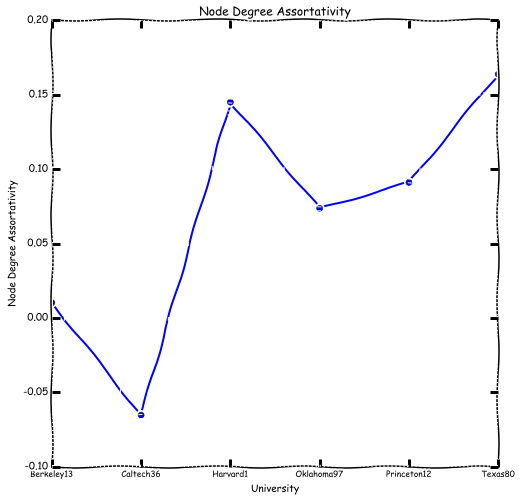

In [192]:
fig = plt.figure(1)
fig.set_size_inches(8, 8, forward=True)
ax = plt.subplot(111)
ax.plot(range(len(filenames)), deg_assort, marker = 'o')
ax.set_title('Node Degree Assortativity')
ax.set_xlabel('University')
ax.set_ylabel('Node Degree Assortativity')
ax.grid()
s = plt.xticks(range(len(filenames)), filenames, size='small')
#ax.set_title('o')

As we can see the highest similarity of connections in the graph with respect to the node degree were in Texas and Harvard, whereas the smallest ones were on Caltech and Berkeley.

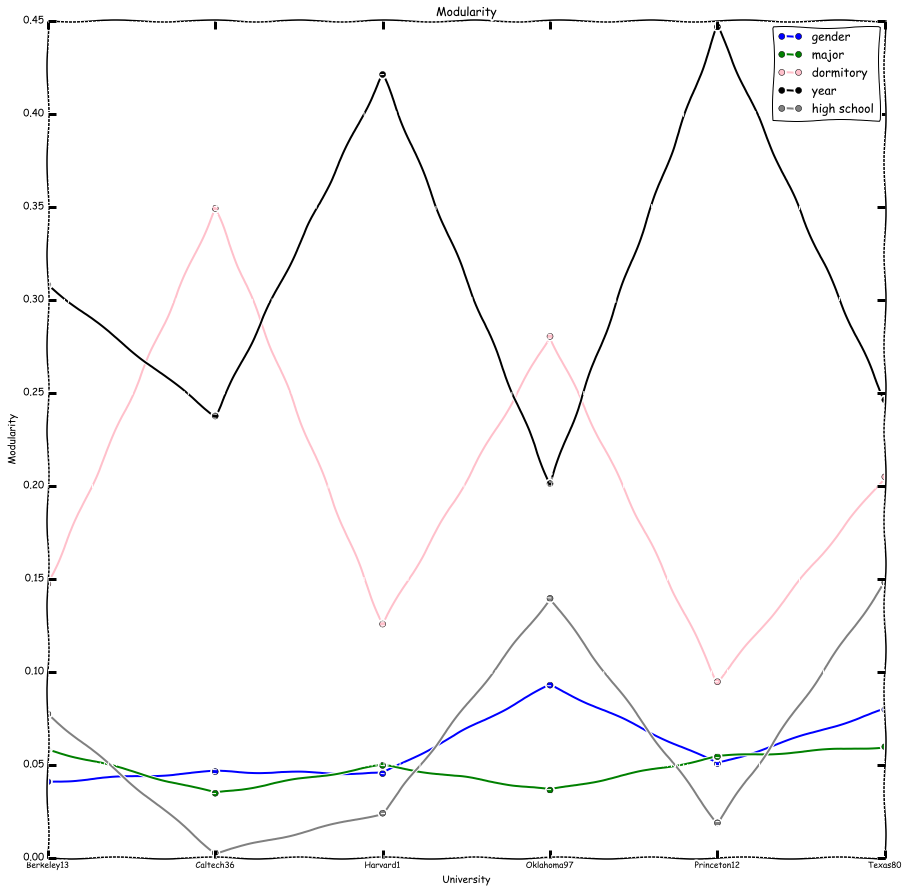

In [221]:
fig = plt.figure(2)
fig.set_size_inches(15, 15, forward=True)
ax = plt.subplot(111)
k = 1
axes = []
m = np.array(attr_assort).transpose()
colors = ('red', 'blue', 'green', 'pink', 'black', 'grey')
#print m
for i in np.array(attr_assort).transpose():
    axes += ax.plot(range(len(filenames)), i, marker = 'o', color = colors[k])
    k += 1
ax.set_title('Modularity')
ax.set_xlabel('University')
ax.set_ylabel('Modularity')

ax.legend(tuple(axes), attributes)
ax.grid()
s = plt.xticks(range(len(filenames)), filenames, size='small')

The highest modularity is for year and dormitory attributes. Different attributes have different modularity for different universities. Besides, it's interesting to note that pairs of attributes year - dormitory and gender - major have modularity graphics which are almost mirror reflections, but have similar values. It's very interesting to note that school in not a key attribute for top, well-known universities where students are from all over the world (Harvard, Princeton, Barkley, Caltech), whereas in Oklahoma and Texas universities, which are not so famous, it's significantly more important.